<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week8%20UTS/Regression%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Andi Cleopatra Maryam Jamila
#### 1103213071
#### Regression model


# **Memuat Library**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Memuat Dataset**

In [ ]:
# Load dataset
df = pd.read_csv('/content/sample_data/RegresiUTSTelkom.csv')

# Menampilkan lima data pertama
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [ ]:
# Cek nama kolom dan data
print(df.columns)
print(df.head())


Index(['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506',
       '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481',
       '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307',
       '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767',
       '-41.1245', '-8.40816

# **EDA: Deskripsi Data**

In [ ]:
df.describe()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,...,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,1998.397077,43.387113,1.289515,8.658222,1.164110,-6.553580,-9.521968,-2.391046,-1.793215,3.727868,...,15.755411,-73.461537,41.542388,37.934163,0.315750,17.669292,-26.315520,4.458653,20.035229,1.329104
std,10.931056,6.067557,51.580393,35.268505,16.322802,22.860803,12.857763,14.571853,7.963822,10.582869,...,32.099666,175.619058,122.228915,95.050718,16.161780,114.428002,173.977455,13.346567,185.558415,22.088598
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954667,-26.059848,-11.462775,-8.487507,-20.666455,-18.441005,-10.780360,-6.468390,-2.293670,...,-1.812658,-139.555737,-20.987115,-4.669655,-6.781598,-31.580617,-101.530305,-2.566137,-59.509453,-8.820248
50%,2002.000000,44.258490,8.417725,10.476235,-0.652855,-6.007770,-11.188355,-2.046625,-1.736415,3.822305,...,9.171850,-53.089115,28.790580,33.623815,0.820830,15.598520,-21.204225,3.117645,7.759910,0.053015
75%,2006.000000,47.833875,36.124030,29.764685,8.787548,7.741877,-2.388945,6.508587,2.913455,9.961865,...,26.274487,13.478793,89.661785,77.785810,8.471000,67.795110,52.389322,9.967742,86.351645,9.679540
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


# **Visualisasi Data: Histogram dan Boxplot**

Text(0.5, 1.0, '73.0775')

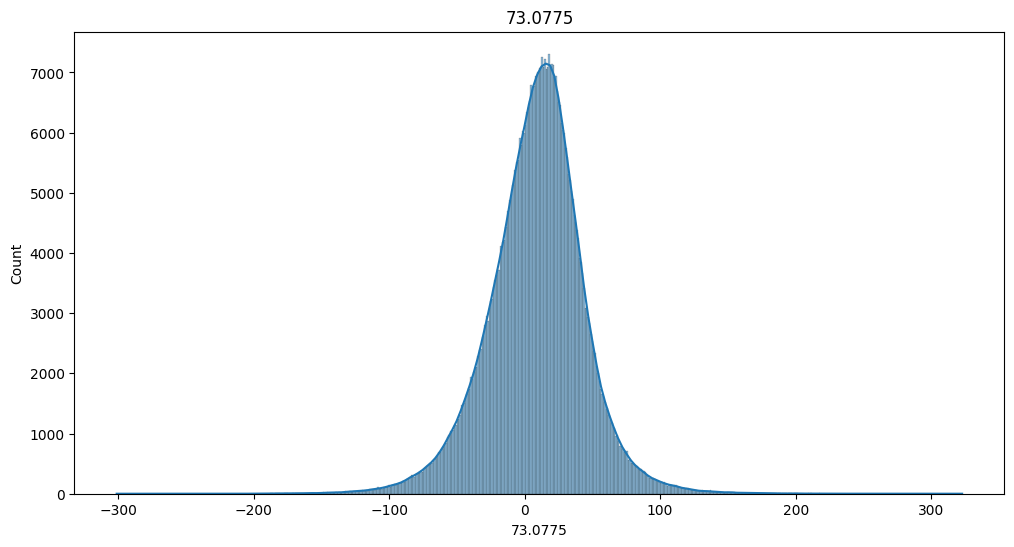

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['73.0775'], kde=True)
plt.title("73.0775")

Text(0.5, 1.0, '73.0775')

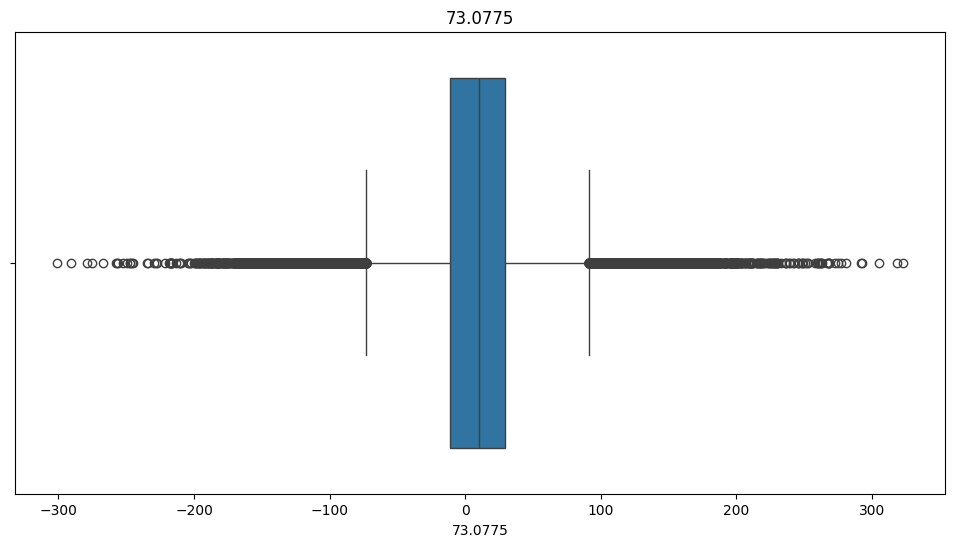

In [ ]:
# Boxplot untuk melihat outlier
plt.figure(figsize=(12,6))
sns.boxplot(x=df['73.0775'])
plt.title("73.0775")

# **Korelasi Antar Fitur**

Text(0.5, 1.0, 'Korelasi Antar Fitur')

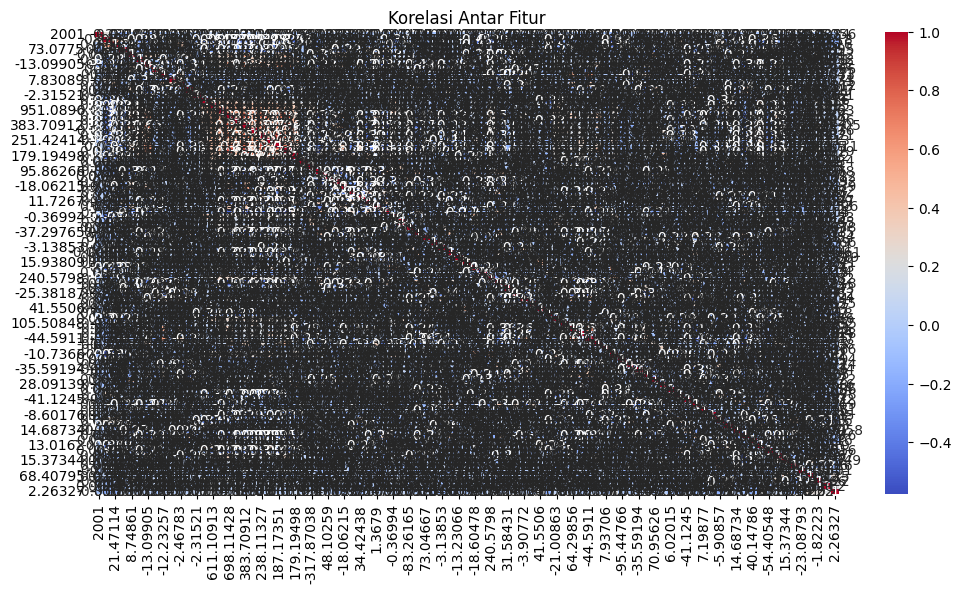

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Fitur")

# **Data Preprocessing dan Split Data**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Contoh data (sesuaikan dengan dataset)
import pandas as pd
import numpy as np
data = pd.DataFrame({
    'feature1': ['2001', '49.94357', '21.47114', '40.14786', '13.0162'],
    'feature2': ['41.5506', '1.11144', '1.3679', '11.7267', '1.3679'],
})

In [ ]:
# Pisahkan fitur (X) dan target (y) jika perlu
X = data[['feature1', 'feature2']]
y = [1, 0, 1, 0, 1]

In [ ]:
# Menangani nilai yang hilang
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [ ]:
# Pastikan dimensi sesuai
print(X_imputed.shape)  # Harus (5, 2) karena ada 5 baris dan 2 fitur
print(len(y))  # Harus 5 elemen

(5, 2)
5


In [ ]:
# Pisahkan data latih dan data uji
from sklearn.model_selection import train_test_split
X_train_imputed, X_test_imputed, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [ ]:
# Memeriksa apakah masih ada nilai NaN setelah imputasi
print(pd.DataFrame(X_train_imputed).isnull().sum())
print(pd.DataFrame(X_test_imputed).isnull().sum())

0    0
1    0
dtype: int64
0    0
1    0
dtype: int64


In [ ]:
print(X_train_imputed.shape, X_test_imputed.shape)
print(len(y_train), len(y_test))

(4, 2) (1, 2)
4 1


# **Pipeline: Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train_imputed)
X_poly_test = poly.transform(X_test_imputed)

In [ ]:
from sklearn.linear_model import LinearRegression

# Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Prediksi dan Evaluasi
y_poly_pred = poly_model.predict(X_poly_test)
print("Polynomial Regression - R2:", r2_score(y_test, y_poly_pred))
print("Polynomial Regression - MAE:", mean_absolute_error(y_test, y_poly_pred))
print("Polynomial Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_poly_pred)))


Polynomial Regression - R2: nan
Polynomial Regression - MAE: 1.1003006969996485
Polynomial Regression - RMSE: 1.1003006969996485


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# **Pipeline: Decision Tree Regression**

In [ ]:
print(data.columns)


Index(['feature1', 'feature2'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

# Misalnya X dan y adalah fitur dan variabel target kamu
X = data.drop('feature1', axis=1)
y = data['feature1']

In [ ]:
# Pastikan semua fitur numerik
X = X.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Mengonversi kolom target y menjadi numerik jika perlu
y = pd.to_numeric(y, errors='coerce')

In [ ]:

# Mengisi nilai NaN dengan rata-rata kolom
X = X.fillna(X.mean())

In [ ]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Pastikan tipe data yang sesuai
print(X_train.dtypes)

feature2    float64
dtype: object


In [ ]:
# Inisialisasi dan latih model Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Prediksi dan evaluasi
y_knn_pred = knn_model.predict(X_test)

In [ ]:
# Evaluasi model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("k-NN Regression - R2:", r2_score(y_test, y_knn_pred))
print("k-NN Regression - MAE:", mean_absolute_error(y_test, y_knn_pred))
print("k-NN Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_knn_pred)))

k-NN Regression - R2: nan
k-NN Regression - MAE: 36.92737
k-NN Regression - RMSE: 36.92737


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# **Pipeline: k-NN Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Misalnya data adalah datasetmu
X = data.drop('feature1', axis=1)
y = data['feature1']

In [ ]:
# Mengonversi semua kolom X menjadi numerik
X = X.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Mengonversi kolom target y menjadi numerik jika perlu
y = pd.to_numeric(y, errors='coerce')

In [ ]:
# Mengisi nilai NaN dengan rata-rata kolom untuk X
X = X.fillna(X.mean())

In [ ]:
# Membagi data menjadi pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Pastikan tipe data yang sesuai
print(X_train.dtypes)

feature2    float64
dtype: object


In [ ]:

# Inisialisasi dan latih model k-NN dengan n_neighbors=1
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
# Prediksi dan evaluasi
y_knn_pred = knn_model.predict(X_test)

In [ ]:
# Evaluasi model
print("k-NN Regression - R2:", r2_score(y_test, y_knn_pred))
print("k-NN Regression - MAE:", mean_absolute_error(y_test, y_knn_pred))
print("k-NN Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_knn_pred)))

k-NN Regression - R2: nan
k-NN Regression - MAE: 36.92737
k-NN Regression - RMSE: 36.92737


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


**Pipeline: XGBoost Regression**

In [ ]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Prediksi dan Evaluasi
y_xgb_pred = xgb_model.predict(X_test)
print("XGBoost Regression - R2:", r2_score(y_test, y_xgb_pred))
print("XGBoost Regression - MAE:", mean_absolute_error(y_test, y_xgb_pred))
print("XGBoost Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_xgb_pred)))

XGBoost Regression - R2: nan
XGBoost Regression - MAE: 32.69944844848633
XGBoost Regression - RMSE: 32.69944844848633


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


**Pipeline: XGBoost Regression**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Misalnya X dan y adalah fitur dan target
X = data.drop('feature1', axis=1)
y = data['feature1']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
# Tentukan parameter grid untuk pencarian grid
param_grid_tree = {'max_depth': [5, 10], 'min_samples_split': [2, 5]}

In [ ]:
# Lakukan pencarian grid dengan validasi silang cv=3 karena data pelatihan sangat sedikit
grid_search_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree, cv=2)
grid_search_tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
print(X_train.isnull().sum())  # Mengecek apakah ada NaN dalam fitur
print(y_train.isnull().sum())  # Mengecek apakah ada NaN dalam target

feature2    0
dtype: int64
0


In [ ]:
print(X_train.dtypes)  # Menampilkan tipe data setiap kolom
print(X_train.head())  # Melihat beberapa baris pertama dari data


feature2    object
dtype: object
  feature2
4   1.3679
2   1.3679
0  41.5506
3  11.7267


In [ ]:
# Cek kolom yang mengandung nilai string dan ubah ke numerik jika perlu
X_train = X_train.apply(pd.to_numeric, errors='coerce')


In [ ]:
X_train = X_train.fillna(X_train.mean())  # Mengisi NaN dengan rata-rata


In [ ]:
print(X_train.isnull().sum())  # Pastikan tidak ada NaN setelah pengisian


feature2    0
dtype: int64


In [ ]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
print(X_test.dtypes)  # Menampilkan tipe data dari setiap kolom


feature2    object
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_test['feature2'] = label_encoder.fit_transform(X_test['feature2'])


In [ ]:
X_test['feature2'] = pd.to_numeric(X_test['feature2'], errors='coerce')


In [ ]:
X_test = X_test.fillna(X_test.mean())  # Mengisi NaN dengan rata-rata


In [ ]:
# Prediksi dan Evaluasi
y_xgb_pred = xgb_model.predict(X_test)
print("XGBoost Regression - R2:", r2_score(y_test, y_xgb_pred))
print("XGBoost Regression - MAE:", mean_absolute_error(y_test, y_xgb_pred))
print("XGBoost Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_xgb_pred)))

XGBoost Regression - R2: nan
XGBoost Regression - MAE: 32.69944844848633
XGBoost Regression - RMSE: 32.69944844848633


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# **Hyperparameter Tuning for Decision Tree**

In [ ]:
grid_search_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree, cv=2)
grid_search_tree.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_tree = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
grid_search_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree, cv=2)  # Menggunakan 2 fold
grid_search_tree.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)

Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}


# **Hyperparameter Tuning for XGBoost**

In [ ]:
# Konversi kolom ke kategori
X_train['feature2'] = X_train['feature2'].astype('category')
X_test['feature2'] = X_test['feature2'].astype('category')

In [ ]:
# Membuat model dengan enable_categorical=True
xgb_model = XGBRegressor(learning_rate=0.1, n_estimators=100, enable_categorical=True)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Prediksi
y_pred = xgb_model.predict(X_test)

In [ ]:
# Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 27.066236460266115
RMSE: 27.071143311645496
